In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df0=pd.read_csv('/content/credit.csv')
df1=df0.copy()

In [196]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


Feature

In [197]:
print(df1.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [198]:
#Drop irrelevent columns
df1.drop(['ID','SSN','Occupation','Type_of_Loan','Name'],axis=1,inplace=True)

# Encoding

In [199]:
df1.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Credit_Mix             100000 non-null  object
 1   Payment_of_Min_Amount  100000 non-null  object
 2   Payment_Behaviour      100000 non-null  object
 3   Credit_Score           100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [200]:
df1['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [201]:
df1['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [202]:
df1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [203]:
# One-Hot Encoding
#df1= pd.get_dummies(df1, columns=['Occupation'])

# Display the DataFrame
print(df1.head())

     ID  Customer_ID  Month   Age  Annual_Income  Monthly_Inhand_Salary  \
0  5634         3392      1  23.0       19114.12            1824.843333   
1  5635         3392      2  23.0       19114.12            1824.843333   
2  5636         3392      3  23.0       19114.12            1824.843333   
3  5637         3392      4  23.0       19114.12            1824.843333   
4  5638         3392      5  23.0       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                3.0              4.0            3.0          4.0  ...   
1                3.0              4.0            3.0          4.0  ...   
2                3.0              4.0            3.0          4.0  ...   
3                3.0              4.0            3.0          4.0  ...   
4                3.0              4.0            3.0          4.0  ...   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0        Good          

In [204]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Credit_Mix'
le = LabelEncoder()
df1['Credit_Mix'] = le.fit_transform(df1['Credit_Mix'])

# Label Encoding for 'Payment_of_Min_Amount'
df1['Payment_of_Min_Amount'] = le.fit_transform(df1['Payment_of_Min_Amount'])

# Label Encoding for 'Payment_Behaviour'
df1['Payment_Behaviour'] = le.fit_transform(df1['Payment_Behaviour'])
#df1['Credit_Score'] = le.fit_transform(df1['Credit_Score'])


Target column mapping

In [205]:
# Define the mapping
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Apply the mapping to the target column
df1['Credit_Score'] = df1['Credit_Score'].map(credit_score_mapping)

# Display the updated Dataset
df1.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,2
1,5635,3392,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,2
2,5636,3392,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,2
3,5637,3392,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,2
4,5638,3392,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,2


# Remove Highly Correlated Variables

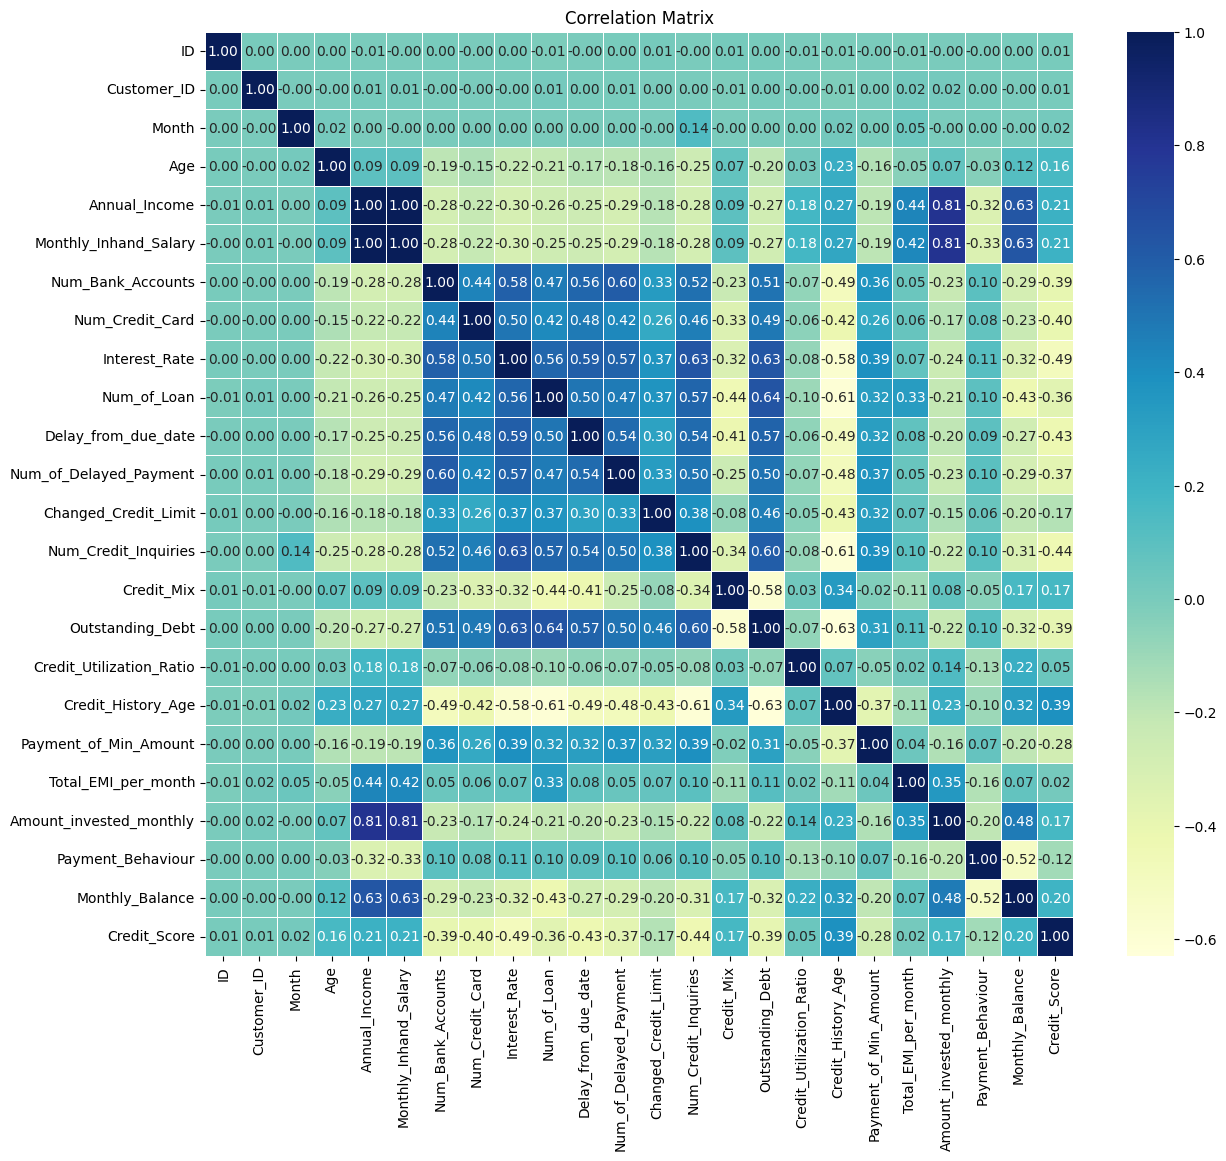

In [206]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [207]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.81
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.81
Amount_invested_monthly and Annual_Income: 0.81
Amount_invested_monthly and Monthly_Inhand_Salary: 0.81


# create new feature

In [208]:
#create new feature [Savings_Ratio = Amount_invested_monthly / Monthly_Inhand_Salary]
df1['Saving_ratio'] = df1['Amount_invested_monthly'] / df1['Monthly_Inhand_Salary']

**Drop Columns Monthly_Inhand_Salary and Amount_invested_monthly**

In [209]:
#drop Columns Monthly_Inhand_Salary and Amount_invested_monthly as its highly correlated with Annual_Income and created a new feature [Savings_Ratio = Amount_invested_monthly / Monthly_Inhand_Salary]
df1.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'],axis=1,inplace=True)

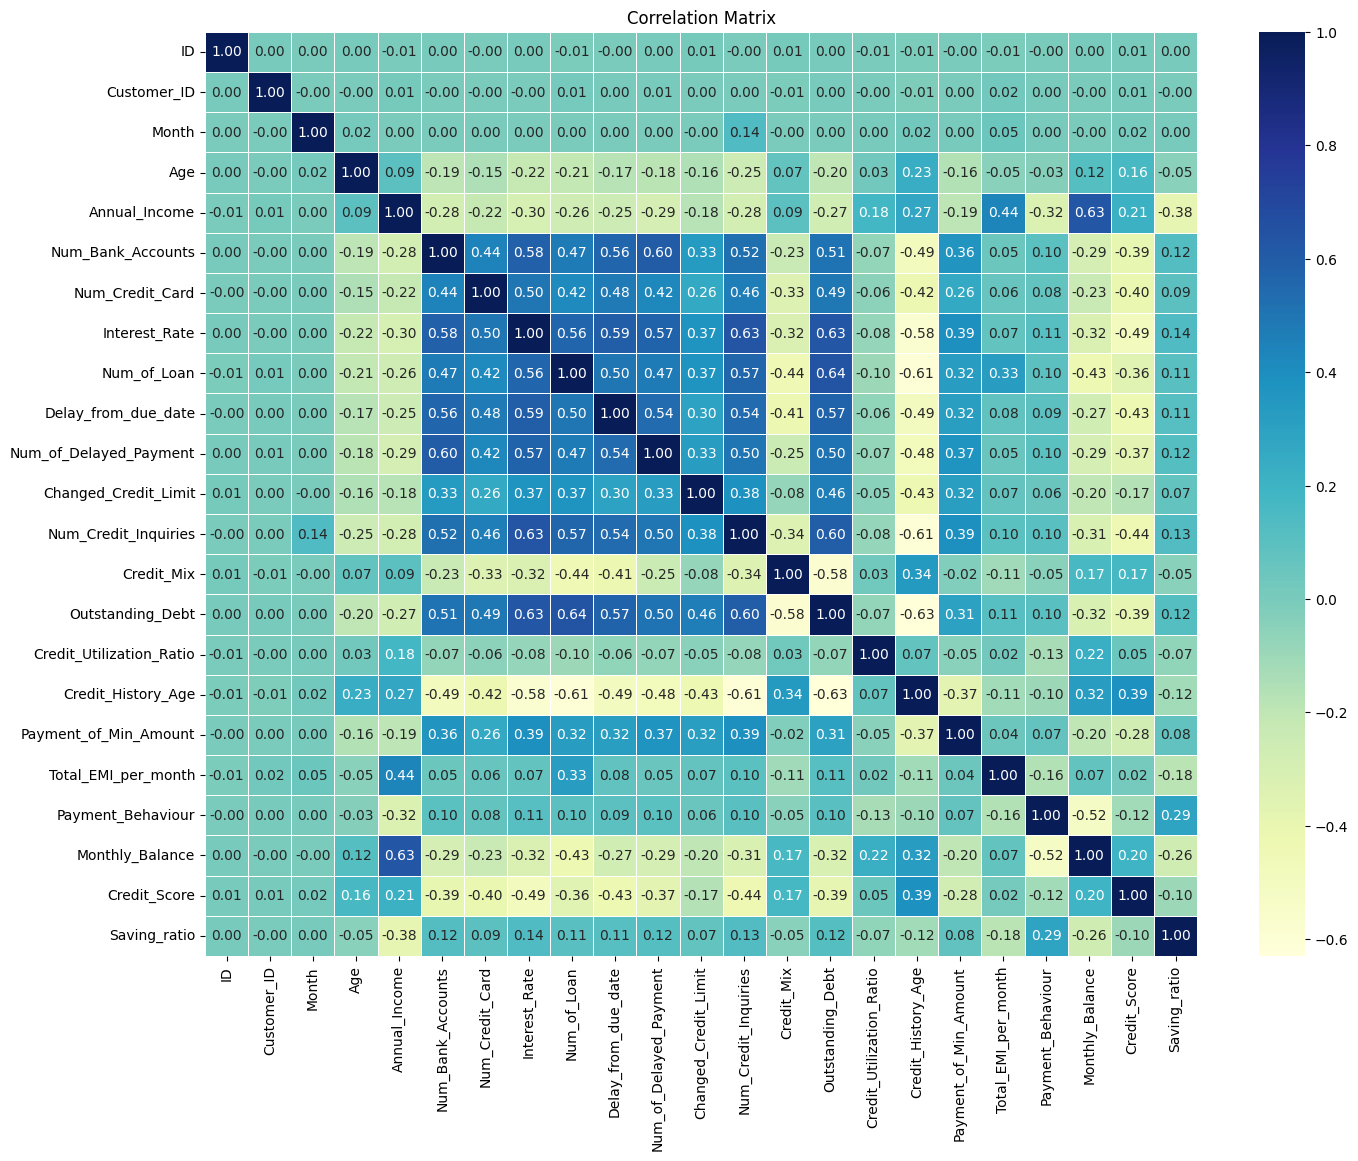

In [210]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [211]:
correlation_matrix

,ID,Customer_ID,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Saving_ratio
ID,1.000000,1.235872e-03,5.291503e-05,0.003338,-5.356989e-03,0.004826,-0.001900,3.956573e-03,-1.013609e-02,-0.004730,...,1.034260e-02,2.941249e-03,-0.005402,-0.005604,-0.003428,-0.009127,-0.002116,0.000859,0.005757,0.000818
Customer_ID,0.001236,1.000000e+00,-6.660113e-17,-0.002172,1.076923e-02,-0.001189,-0.004601,-4.712091e-03,1.482832e-02,0.004581,...,-9.861451e-03,4.381594e-03,-0.002174,-0.014822,0.000679,0.023904,0.001486,-0.000922,0.006337,-0.000773
Month,0.000053,-6.660113e-17,1.000000e+00,0.016990,1.530483e-17,0.000079,0.000090,6.790115e-18,1.555542e-16,0.000342,...,-1.025995e-16,3.200578e-17,0.002440,0.022784,0.001287,0.049716,0.004344,-0.002095,0.016291,0.002584
Age,0.003338,-2.172258e-03,1.698955e-02,1.000000,9.152456e-02,-0.190415,-0.148567,-2.175571e-01,-2.135330e-01,-0.174119,...,7.338015e-02,-2.023741e-01,0.025492,0.234618,-0.162497,-0.047334,-0.033357,0.116098,0.160371,-0.047040
Annual_Income,-0.005357,1.076923e-02,1.530483e-17,0.091525,1.000000e+00,-0.284060,-0.217852,-3.023524e-01,-2.555596e-01,-0.250105,...,9.399074e-02,-2.693193e-01,0.175930,0.272374,-0.194421,0.438106,-0.324406,0.625640,0.212606,-0.384706
Num_Bank_Accounts,0.004826,-1.188701e-03,7.909795e-05,-0.190415,-2.840602e-01,1.000000,0.442694,5.843015e-01,4.724831e-01,0.560193,...,-2.287226e-01,5.070634e-01,-0.071783,-0.485331,0.364265,0.050035,0.099795,-0.286709,-0.388165,0.123156
Num_Credit_Card,-0.001900,-4.600690e-03,8.973261e-05,-0.148567,-2.178520e-01,0.442694,1.000000,4.979115e-01,4.179595e-01,0.479762,...,-3.343182e-01,4.903760e-01,-0.055249,-0.417205,0.259624,0.058853,0.075279,-0.231913,-0.404435,0.092435
Interest_Rate,0.003957,-4.712091e-03,6.790115e-18,-0.217557,-3.023524e-01,0.584302,0.497912,1.000000e+00,5.591562e-01,0.589185,...,-3.208077e-01,6.294144e-01,-0.075700,-0.576230,0.391145,0.071651,0.109068,-0.317919,-0.485409,0.136835
Num_of_Loan,-0.010136,1.482832e-02,1.555542e-16,-0.213533,-2.555596e-01,0.472483,0.417960,5.591562e-01,1.000000e+00,0.501599,...,-4.446627e-01,6.387126e-01,-0.100469,-0.605727,0.323988,0.328485,0.095428,-0.429416,-0.358355,0.105406
Delay_from_due_date,-0.004730,4.581213e-03,3.418202e-04,-0.174119,-2.501051e-01,0.560193,0.479762,5.891847e-01,5.015994e-01,1.000000,...,-4.139350e-01,5.722057e-01,-0.063823,-0.491484,0.316006,0.078820,0.090029,-0.272273,-0.431446,0.112928


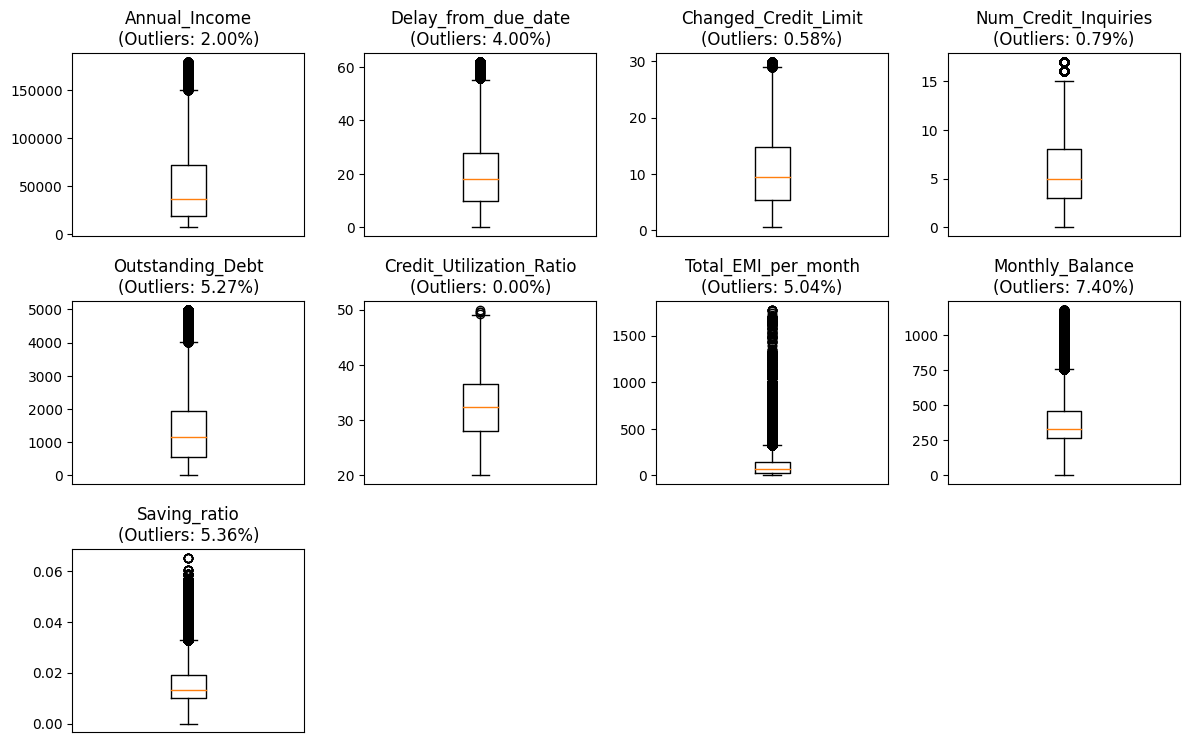

In [212]:
# List of continuous columns
continuous_columns = ['Annual_Income','Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio','Total_EMI_per_month',
                     'Monthly_Balance','Saving_ratio']

# Calculate outlier percentage for each column
outlier_percentages = {}
for col in continuous_columns:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((df1[col] < lower_bound) | (df1[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(df1[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

In [213]:
from sklearn.preprocessing import RobustScaler
# Apply log transformation to skewed features
#columns_to_transform = ['Annual_Income', 'Outstanding_Debt', 'Total_EMI_per_month','Saving_ratio', 'Monthly_Balance']

columns_to_transform = ['Annual_Income','Delay_from_due_date', 'Outstanding_Debt','Total_EMI_per_month',
                     'Monthly_Balance','Saving_ratio']

# Apply log1p transformation to avoid issues with zero values
df1[columns_to_transform] = df1[columns_to_transform].apply(np.log1p)

# Check the transformation results
#print(df1[columns_to_transform].head())


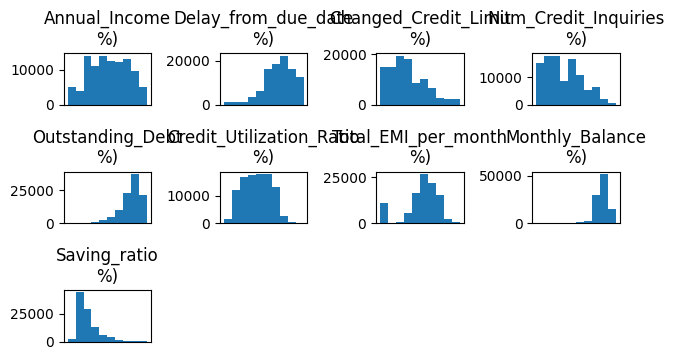

In [214]:
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(4, 4, i)
    plt.hist(df1[col])
    plt.title(f'{col}\n%)')
    plt.xticks([])



plt.tight_layout()
plt.show()

In [215]:
print(df1.head())

     ID  Customer_ID  Month   Age  Annual_Income  Num_Bank_Accounts  \
0  5634         3392      1  23.0       9.858235                3.0   
1  5635         3392      2  23.0       9.858235                3.0   
2  5636         3392      3  23.0       9.858235                3.0   
3  5637         3392      4  23.0       9.858235                3.0   
4  5638         3392      5  23.0       9.858235                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  ...  \
0              4.0            3.0          4.0             1.386294  ...   
1              4.0            3.0          4.0             1.386294  ...   
2              4.0            3.0          4.0             1.386294  ...   
3              4.0            3.0          4.0             1.791759  ...   
4              4.0            3.0          4.0             1.945910  ...   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0           1          6.698243    

In [216]:
print(df1.tail())

           ID  Customer_ID  Month   Age  Annual_Income  Num_Bank_Accounts  \
99995  155625        37932      4  25.0      10.587341                4.0   
99996  155626        37932      5  25.0      10.587341                4.0   
99997  155627        37932      6  25.0      10.587341                4.0   
99998  155628        37932      7  25.0      10.587341                4.0   
99999  155629        37932      8  25.0      10.587341                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  ...  \
99995              6.0            7.0          2.0             3.178054  ...   
99996              6.0            7.0          2.0             2.944439  ...   
99997              6.0            7.0          2.0             3.332205  ...   
99998              6.0            7.0          2.0             3.044522  ...   
99999              6.0            7.0          2.0             2.944439  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_

Train Test split

In [244]:
x=df1.drop(columns = ['Credit_Score'])

In [217]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize StandardScaler
#scaler = StandardScaler()
scaler=RobustScaler()

# Separate the features and the target variable
X = df1.drop(columns = ['Credit_Score'])
y = df1['Credit_Score']

pca = PCA(n_components=0.95)  # Retain 95% of variance
X =pca.fit_transform(X)


# Step 1: Split the data into 70% training and 30% temporary sets
X_train1, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split the temporary set into 50% validation and 50% test sets
X_val1, X_test1, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train1)

# Use the same transformation on the test data
X_test = scaler.transform(X_test1)

# Use the same transformation on the Validation data
X_val= scaler.transform(X_val1)



# Apply PCA to reduce dimensions before model training

#X_train= pca.fit_transform(X_train1)
#X_test = pca.transform(X_test1)
#X_val = pca.transform(X_val1)

# Display the sizes of the resulting sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 70000
Validation set size: 15000
Test set size: 15000


# Model Selection

In [218]:
c

NameError: name 'c' is not defined

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score


# Initialize the model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = random_forest.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Random Forest:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
print("Random Forest Validation Accuracy without hyperparameter tuning:", val_accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred))

Random Forest:
  Precision: 0.8234
  Recall: 0.8232
  F1 Score: 0.8233
Random Forest Validation Accuracy without hyperparameter tuning: 0.8232
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.81      0.80      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



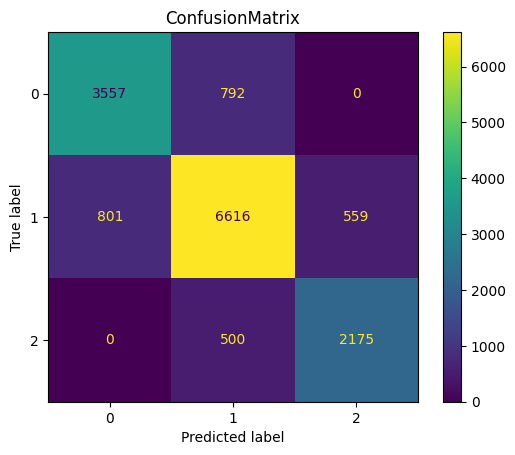

In [220]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_val, y_val_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.title('ConfusionMatrix')
plt.show()

In [221]:
confusion_matrix

array([[3557,  792,    0],
       [ 801, 6616,  559],
       [   0,  500, 2175]])

**Cross_Validation Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores_rf = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean()}")

***Performance Validation -Testing dataset-Random Forest*** **bold text**

In [ ]:
# Now predict using the modified test set
y_test_pred = random_forest.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("RF PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("RF testing Accuracy",test_accuracy_rf)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


**Random Forest Giving better Result**

In [223]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from scipy.stats import randint

# Define the parameter grid
#param_dist = {
 #   'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
  #  'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
   # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    #'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
#}


param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=50,  # Number of iterations to sample
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)



# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_

# Predict on the validation set with the best model
y_val_pred = best_rf.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Best Random Forest after Hyperparameter Tuning:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
print("Random Forest Validation Accuracy after hyperparameter tuning:", val_accuracy_rf)
print("Random Forest Classification Report after hyperparameter tuning:")
print(classification_report(y_val, y_val_pred))

# Print best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest after Hyperparameter Tuning:
  Precision: 0.8234
  Recall: 0.8233
  F1 Score: 0.8233
Random Forest Validation Accuracy after hyperparameter tuning: 0.8232666666666667
Random Forest Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.82      0.81      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}


Model with Best Parameters

In [265]:

# Best parameters from RandomSearchCV
best_params = {
    'bootstrap': False,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 413
}

# Initialize the RandomForestClassifier with the best parameters
best_rf_model = RandomForestClassifier(
    bootstrap=best_params['bootstrap'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42,  # Always use a fixed seed for reproducibility
    n_jobs=-1  # Use all available cores for faster training
)

# Fit the RandomForest model on the entire training dataset
best_rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Calculate accuracy, precision, recall, and F1 score on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Output the performance metrics
print('Random Forest Model Performance on Validation Set:')
print(f'  Accuracy: {val_accuracy:.4f}')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Display a classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Predict on the test set (if available)
y_test_pred = best_rf_model.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nRandom Forest Model Test Accuracy:", test_accuracy)

# Display classification report for the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Random Forest Model Performance on Validation Set:
  Accuracy: 0.8233
  Precision: 0.8234
  Recall: 0.8233
  F1 Score: 0.8233

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.82      0.81      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000


Random Forest Model Test Accuracy: 0.8218666666666666

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4350
           1       0.83      0.83      0.83      7976
           2       0.79      0.80      0.80      2674

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82 

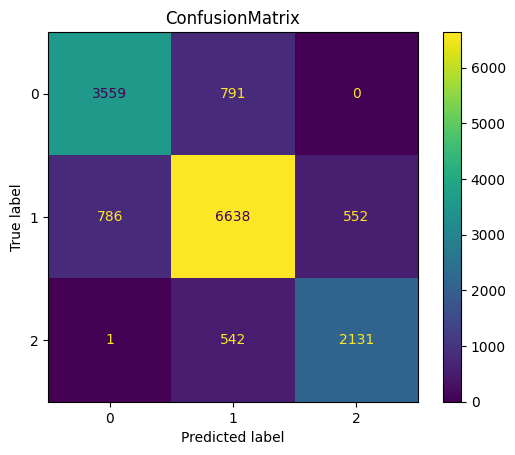

In [250]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.title('ConfusionMatrix')
plt.show()

In [257]:
confusion_matrix

array([[3559,  791,    0],
       [ 786, 6638,  552],
       [   1,  542, 2131]])

feature importance

In [224]:
importances = best_rf.feature_importances_

In [235]:
num_features = X_train.shape[1]
print(f'Number of features: {num_features}')

Number of features: 2


In [236]:
print(X_train[:5])


[[ 0.59649844 -0.76583224]
 [-0.08266994 -0.39740705]
 [ 0.44780834  0.76733775]
 [ 0.69914509  0.01765521]
 [ 0.2889527  -0.69328465]]


In [240]:
print(f'Number of components after PCA: {pca.n_components_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Total explained variance: {np.sum(pca.explained_variance_ratio_)}')


Number of components after PCA: 2
Explained variance ratio: [0.90115679 0.09883827]
Total explained variance: 0.9999950583522191


**Feature Importance in PCA:** Since PCA components are linear combinations of the original features, you can look at the components_ attribute to understand the contribution of each original feature to the principal components

In [239]:
print(f'PCA components:\n{pca.components_}')

PCA components:
[[-9.99999894e-01 -4.59716271e-04 -2.79996340e-09 -8.29667656e-07
   6.25671773e-08 -2.89026744e-07  9.07558840e-08 -7.98577159e-07
   5.72518947e-07  1.29083451e-07 -2.67819539e-07 -1.32345802e-06
   1.96564698e-07 -1.92156175e-07 -1.81523708e-07  6.38429185e-07
   1.29057167e-05  5.48841965e-08  3.36308225e-07  9.09425803e-08
  -1.96054652e-08 -1.48571359e-10]
 [-4.59717593e-04  9.99999889e-01 -1.43439061e-11 -1.63422572e-06
   7.94314222e-07 -2.16111162e-07 -6.62738048e-07 -2.87537380e-06
   2.53204383e-06  3.71889536e-07  2.24468152e-06  2.98751213e-07
   9.57766533e-08 -5.54127321e-07  6.38894275e-07 -7.72938906e-07
  -1.02980199e-04  3.30656824e-08  2.15773384e-06  1.93226235e-07
  -1.27065616e-07 -4.56737373e-10]]


In [251]:
# Get the components (principal axes in feature space)
components = pca.components_

# Get the original feature names (replace this with your actual feature names)
feature_names = [f'Feature_{i}' for i in range(x.shape[1])]

# Create a DataFrame for PCA components (each row is a component, each column is a feature)
pca_components_df = pd.DataFrame(components, columns=feature_names)

# Calculate the importance of each feature for each component (absolute values)
feature_importance = np.abs(pca_components_df)

# Sum the feature importance across all principal components to get overall importance
overall_feature_importance = feature_importance.sum(axis=0)

# Create a DataFrame for feature importance and sort it
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': overall_feature_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)



               Feature    Importance
Feature_0    Feature_0  1.000460e+00
Feature_1    Feature_1  1.000460e+00
Feature_16  Feature_16  1.158859e-04
Feature_7    Feature_7  3.673951e-06
Feature_8    Feature_8  3.104563e-06
Feature_10  Feature_10  2.512501e-06
Feature_18  Feature_18  2.494042e-06
Feature_3    Feature_3  2.463893e-06
Feature_11  Feature_11  1.622209e-06
Feature_15  Feature_15  1.411368e-06
Feature_4    Feature_4  8.568814e-07
Feature_14  Feature_14  8.204180e-07
Feature_6    Feature_6  7.534939e-07
Feature_13  Feature_13  7.462835e-07
Feature_5    Feature_5  5.051379e-07
Feature_9    Feature_9  5.009730e-07
Feature_12  Feature_12  2.923414e-07
Feature_19  Feature_19  2.841688e-07
Feature_20  Feature_20  1.466711e-07
Feature_17  Feature_17  8.794988e-08
Feature_2    Feature_2  2.814307e-09
Feature_21  Feature_21  6.053087e-10


In [258]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Predict probabilities instead of classes
y_val_prob = best_rf_model.predict_proba(X_val)

# Step 2: Define custom thresholds for each class
# Example: You can adjust these based on business needs
thresholds = [0.6, 0.5, 0.7]  # Custom thresholds for class 0, 1, and 2 respectively

# Step 3: Create a function to apply thresholds
def apply_thresholds(probs, thresholds):
    # Initialize an array for the new predictions
    adjusted_predictions = np.zeros(probs.shape[0])

    for i in range(probs.shape[0]):  # Loop through each sample
        if probs[i, 0] > thresholds[0]:
            adjusted_predictions[i] = 0
        elif probs[i, 1] > thresholds[1]:
            adjusted_predictions[i] = 1
        elif probs[i, 2] > thresholds[2]:
            adjusted_predictions[i] = 2
        else:
            adjusted_predictions[i] = np.argmax(probs[i])  # If no threshold is met, take the highest probability class

    return adjusted_predictions

# Step 4: Apply the custom thresholds
y_val_adjusted = apply_thresholds(y_val_prob, thresholds)

# Step 5: Evaluate the new predictions
print("\nAdjusted Confusion Matrix:")
print(confusion_matrix(y_val, y_val_adjusted))

print("\nClassification Report with Adjusted Thresholds:")
print(classification_report(y_val, y_val_adjusted))

# Optional: Apply the same to the test set
y_test_prob = best_rf_model.predict_proba(X_test)
y_test_adjusted = apply_thresholds(y_test_prob, thresholds)

print("\nTest Set Classification Report with Adjusted Thresholds:")
print(classification_report(y_test, y_test_adjusted))



Adjusted Confusion Matrix:
[[3541  808    0]
 [ 798 6626  552]
 [   0  493 2182]]

Classification Report with Adjusted Thresholds:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.82      0.81      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000


Test Set Classification Report with Adjusted Thresholds:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4350
           1       0.83      0.83      0.83      7976
           2       0.79      0.80      0.80      2674

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



In [260]:
# Define class weights based on the cost matrix
class_weights = {0: 1.5, 1: 1.0, 2: 2.0}  # Adjust these weights based on business costs

# Initialize the RandomForestClassifier with class weights
cost_sensitive_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=413,
    random_state=42,
    class_weight=class_weights,  # Apply cost-sensitive weights
    n_jobs=-1
)

# Train the model
cost_sensitive_rf.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred_cost_sensitive = cost_sensitive_rf.predict(X_val)
y_test_pred_cost_sensitive = cost_sensitive_rf.predict(X_test)

# Evaluate performance using the new cost-sensitive model
val_accuracy_cost_sensitive = accuracy_score(y_val, y_val_pred_cost_sensitive)
print("Validation Accuracy with Cost-Sensitive Model:", val_accuracy_cost_sensitive)
print("\nClassification Report with Cost-Sensitive Model on Validation Set:")
print(classification_report(y_val, y_val_pred_cost_sensitive))

# Similarly, for the test set
test_accuracy_cost_sensitive = accuracy_score(y_test, y_test_pred_cost_sensitive)
print("\nTest Set Accuracy with Cost-Sensitive Model:", test_accuracy_cost_sensitive)
print("\nClassification Report with Cost-Sensitive Model on Test Set:")
print(classification_report(y_test, y_test_pred_cost_sensitive))


Validation Accuracy with Cost-Sensitive Model: 0.8238666666666666

Classification Report with Cost-Sensitive Model on Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.82      0.81      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000


Test Set Accuracy with Cost-Sensitive Model: 0.8225333333333333

Classification Report with Cost-Sensitive Model on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4350
           1       0.83      0.83      0.83      7976
           2       0.79      0.80      0.80      2674

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.8

In [269]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix_cost_sensitive = confusion_matrix(y_test, y_test_pred_cost_sensitive)

# Multiply by cost matrix
cost_matrix = np.array([[0, 5, 10], [3, 0, 2], [10, 2, 0]])
total_cost = np.sum(conf_matrix_cost_sensitive * cost_matrix)

print("\nTotal Misclassification Cost:", total_cost)



Total Misclassification Cost: 8479


In [262]:

# Get prediction probabilities for each class
y_val_probs = best_rf_model.predict_proba(X_val)

# Set custom thresholds for each class (example: 0.4 for Class 0, 0.3 for Class 1, etc.)
thresholds = [0.4, 0.3, 0.3]  # Adjust based on business needs

# Apply the thresholds
y_val_custom_thresh = np.select([y_val_probs[:, 0] > thresholds[0],
                                 y_val_probs[:, 1] > thresholds[1],
                                 y_val_probs[:, 2] > thresholds[2]], [0, 1, 2], default=2)

# Evaluate the model with the adjusted thresholds
print("\nValidation Set Report with Adjusted Thresholds:")
print(classification_report(y_val, y_val_custom_thresh))



Validation Set Report with Adjusted Thresholds:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.81      0.81      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



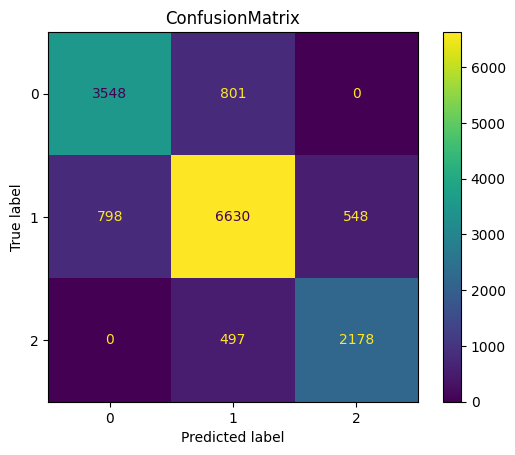

In [263]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_val, y_val_custom_thresh)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.title('ConfusionMatrix')
plt.show()

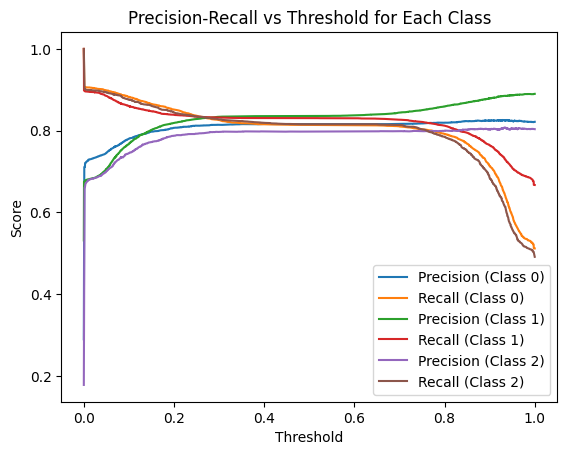


Classification Report with Selected Threshold:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.80      0.82      0.81      2675

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



In [268]:
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_val is multiclass, binarize it
y_val_binarized = label_binarize(y_val, classes=np.unique(y_val))

# Get the predicted probabilities for each class from the RandomForest model
y_scores = best_rf_model.predict_proba(X_val)

# Iterate over each class and calculate precision-recall curve
for i in range(y_val_binarized.shape[1]):
    y_scores_class = y_scores[:, i]  # Predicted probabilities for class i
    precision, recall, thresholds = precision_recall_curve(y_val_binarized[:, i], y_scores_class)

    # Plot precision-recall curve for the current class
    plt.plot(thresholds, precision[:-1], label=f'Precision (Class {i})')
    plt.plot(thresholds, recall[:-1], label=f'Recall (Class {i})')

# Set plot labels and title
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold for Each Class')
plt.legend(loc='best')
plt.show()

# Select a threshold (example: threshold = 0.5)
selected_threshold = 0.5
y_val_pred_threshold = (y_scores >= selected_threshold).astype(int)

# For multiclass classification, consider using the predicted class with the highest score
y_val_pred_classes = y_val_pred_threshold.argmax(axis=1)

# Evaluate the classification report with the selected threshold
print("\nClassification Report with Selected Threshold:")
print(classification_report(y_val, y_val_pred_classes))
